# Explore experiences result on conll2003

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import random
random.seed(12)

import sys
sys.path.insert(1, '../../utils_paper/')
from resultsUtils import build_jsons, json2pandas
from visuClass import visualizer, yaset_pred

%load_ext autoreload
%autoreload 2

# Build jsons

In [2]:
# fetch results and store in different paths (do not launch everytime, it's super slow!!!!)
path2jsons = '../jsons/'

In [3]:
build_jsons('../results/', path2jsons, show_path=False)

100%|██████████| 39/39 [00:57<00:00,  1.49s/it]

Collected 30 xperiences in ../results/ and stored all in ../jsons/


# Analysis

In [4]:
df = json2pandas(path2jsons, trajs = False, fixed_iter=None, verbose=False)

##  Medpost embeddings

In [5]:
#df['best_iter'].plot(kind = 'hist', bins = 30)
print(df.shape)
df.head(5)

(30, 17)


,best_iter,char_embedding_size,char_hidden_layer_size,cpu_cores,dropout_rate,f1,feature_data,hidden_layer_size,nb_iter,nb_train_tokens,opt_decay_use,patience,precision,recall,time_elapsed,word_emb_dim,word_emb_train
0,26,24,32,20,0.5,97.45,False,64,36,154552.0,False,10,97.36,97.55,136.0,25,True
0,5,24,32,20,0.5,95.38,False,64,15,154552.0,False,10,95.21,95.54,56.0,25,True
0,18,24,32,20,0.5,96.73,False,64,28,154552.0,False,10,96.66,96.81,105.0,25,True
0,17,24,32,20,0.5,97.85,False,64,27,154552.0,False,10,97.82,97.87,102.0,25,True
0,30,24,32,20,0.5,96.69,False,64,40,154552.0,False,10,96.64,96.74,150.0,25,True


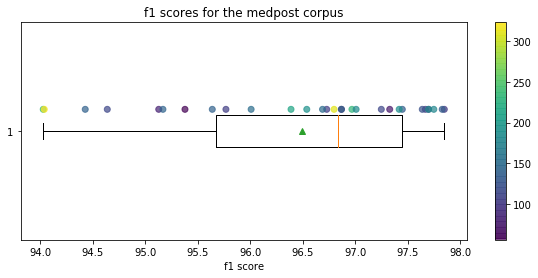

average:  96.49000000000001
sd:  1.1684319977359967
max diff:  3.819999999999993
max diff perc:  0.04062533234074224


In [6]:
plt.figure(figsize=(10,4))
plt.boxplot(df['f1'], vert=False, showmeans=True)
plt.scatter(df['f1'], np.repeat(1.1, len(df['f1'])), alpha = 0.7, c = df.time_elapsed)
plt.xlabel('f1 score')
plt.title('f1 scores for the medpost corpus')
plt.colorbar()
plt.show()
print('average: ', np.mean(df['f1']))
print('sd: ', np.std(df['f1']))
print('max diff: ', np.max(df['f1']) - np.min(df['f1']))
print('max diff perc: ', (np.max(df['f1']) - np.min(df['f1']))/np.min(df['f1']))

## Measure micro scores on dev
### Building results from prediction

In [11]:
from tqdm import tqdm
path2results = '../results/medpost_apply/'
path2golds = '../data/dev.conll'
dev_scores = []
for folder in tqdm(os.listdir(path2results)):
    path2pred = path2results + folder+'/'+'output-model-001.conll'
    join_visu = visualizer(path2golds, path2pred, verbose = False)
    dev_scores.append(join_visu.score_predictions(average = 'micro', punct_ignore = True))


  0%|          | 0/30 [00:00<?, ?it/s]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


  3%|▎         | 1/30 [00:03<01:31,  3.17s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


  7%|▋         | 2/30 [00:06<01:32,  3.29s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 10%|█         | 3/30 [00:09<01:27,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 13%|█▎        | 4/30 [00:13<01:25,  3.27s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 17%|█▋        | 5/30 [00:16<01:21,  3.25s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 20%|██        | 6/30 [00:19<01:17,  3.22s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 23%|██▎       | 7/30 [00:22<01:14,  3.26s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 27%|██▋       | 8/30 [00:25<01:11,  3.24s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 30%|███       | 9/30 [00:29<01:07,  3.22s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 33%|███▎      | 10/30 [00:32<01:04,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 37%|███▋      | 11/30 [00:35<01:01,  3.24s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 40%|████      | 12/30 [00:38<00:58,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 43%|████▎     | 13/30 [00:41<00:54,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 47%|████▋     | 14/30 [00:45<00:51,  3.22s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 50%|█████     | 15/30 [00:48<00:48,  3.21s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 53%|█████▎    | 16/30 [00:51<00:45,  3.22s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 57%|█████▋    | 17/30 [00:54<00:41,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 60%|██████    | 18/30 [00:58<00:38,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 63%|██████▎   | 19/30 [01:01<00:35,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 67%|██████▋   | 20/30 [01:04<00:32,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 70%|███████   | 21/30 [01:07<00:29,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 73%|███████▎  | 22/30 [01:11<00:25,  3.24s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 77%|███████▋  | 23/30 [01:14<00:22,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 80%|████████  | 24/30 [01:17<00:19,  3.22s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 83%|████████▎ | 25/30 [01:20<00:16,  3.22s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 87%|████████▋ | 26/30 [01:23<00:12,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 90%|█████████ | 27/30 [01:27<00:09,  3.22s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 93%|█████████▎| 28/30 [01:30<00:06,  3.23s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


 97%|█████████▋| 29/30 [01:33<00:03,  3.22s/it]

Predicted labels: ['II', 'JJ', 'NNS', 'VVN', 'MC', 'SYM', 'NN', 'VVD', 'DD', 'RR', 'VVNJ', 'CC', 'PND', 'PNR', 'VBB', 'VVB', 'VBZ', 'PUNCT', 'VBD', 'VM', 'VVGN', 'VVG', 'CST', 'VHD', 'PNG', 'VVGJ', 'GE', 'TO', 'VVI', 'PN', 'VHB', 'VVZ', 'VBI', 'VBN', 'VDB', 'NNP', 'CS', 'DB', 'JJR', 'CSN', 'EX', 'VBG', 'VDZ', 'VDD', 'JJT', 'RRT', 'VHZ', 'VHI', 'VHG', 'RRR']


100%|██████████| 30/30 [01:36<00:00,  3.22s/it]


In [12]:
dev_df = pd.DataFrame(dev_scores, columns=['precision', 'recall', 'f1', 'count'])
#dev_df.pivot(index=0, columns=1, values=2)
dev_df.drop(['count'], axis = 1, inplace = True)
dev_df.shape

(30, 3)

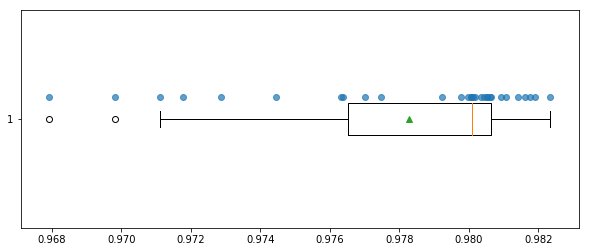

average:  0.9782906956250591
sd:  0.0038873724842212933
max diff:  0.014438524423475818
max diff perc:  1.4917219934448271


In [13]:
plt.figure(figsize=(10,4))
plt.boxplot(dev_df['f1'], vert=False, showmeans=True)
plt.scatter(dev_df['f1'], np.repeat(1.1, len(dev_df['f1'])), alpha = 0.7)
plt.show()
print('average: ', np.mean(dev_df['f1']))
print('sd: ', np.std(dev_df['f1']))
print('max diff: ', np.max(dev_df['f1']) - np.min(dev_df['f1']))
print('max diff perc: ', 100*(np.max(dev_df['f1']) - np.min(dev_df['f1']))/np.min(dev_df['f1']))

## Mean iter time on train

In [14]:
df.cpu_cores.value_counts()

20    30
Name: cpu_cores, dtype: int64

In [12]:
nb_train = np.mean(df.nb_train_tokens )
print(nb_train)
nb_sents = 6701
df.mean_iter_time_s
valid_time = pd.DataFrame([t for t in df.mean_iter_time_s if t < 400])
print(len(valid_time))
sent_sec = nb_sents / valid_time
tok_sec = nb_train / valid_time
print('nb_sents /s {}'.format(np.mean(sent_sec)))
print('nb_toks /s {}'.format(np.mean(tok_sec)))

154552.0
15
nb_sents /s 0    32.848456
dtype: float64
nb_toks /s 0    757.61745
dtype: float64


In [11]:
df.mean_iter_time_s

0    210.0
0    206.0
0    209.0
0    209.0
0    209.0
0    210.0
0    208.0
0    204.0
0    199.0
0    189.0
0    187.0
0    210.0
0    187.0
0    207.0
0    223.0
0    633.0
0    532.0
0    532.0
0    489.0
0    462.0
0    417.0
0    429.0
0    426.0
0    421.0
0    423.0
0    500.0
0    435.0
0    467.0
0    426.0
0    420.0
Name: mean_iter_time_s, dtype: float64